# **손글씨 숫자 분류 모델 구현 및 시각화**

In [1]:
def visualize_batch(images, labels, nrows=8, ncols=8, img_shape=(8, 8)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))

    for ax, img, label in zip(axes.flatten(), images, labels):
        ax.imshow(img.reshape(img_shape), cmap='gray')
        ax.set_title(str(label.item()))
        ax.axis('off')

    plt.tight_layout()
    plt.show()

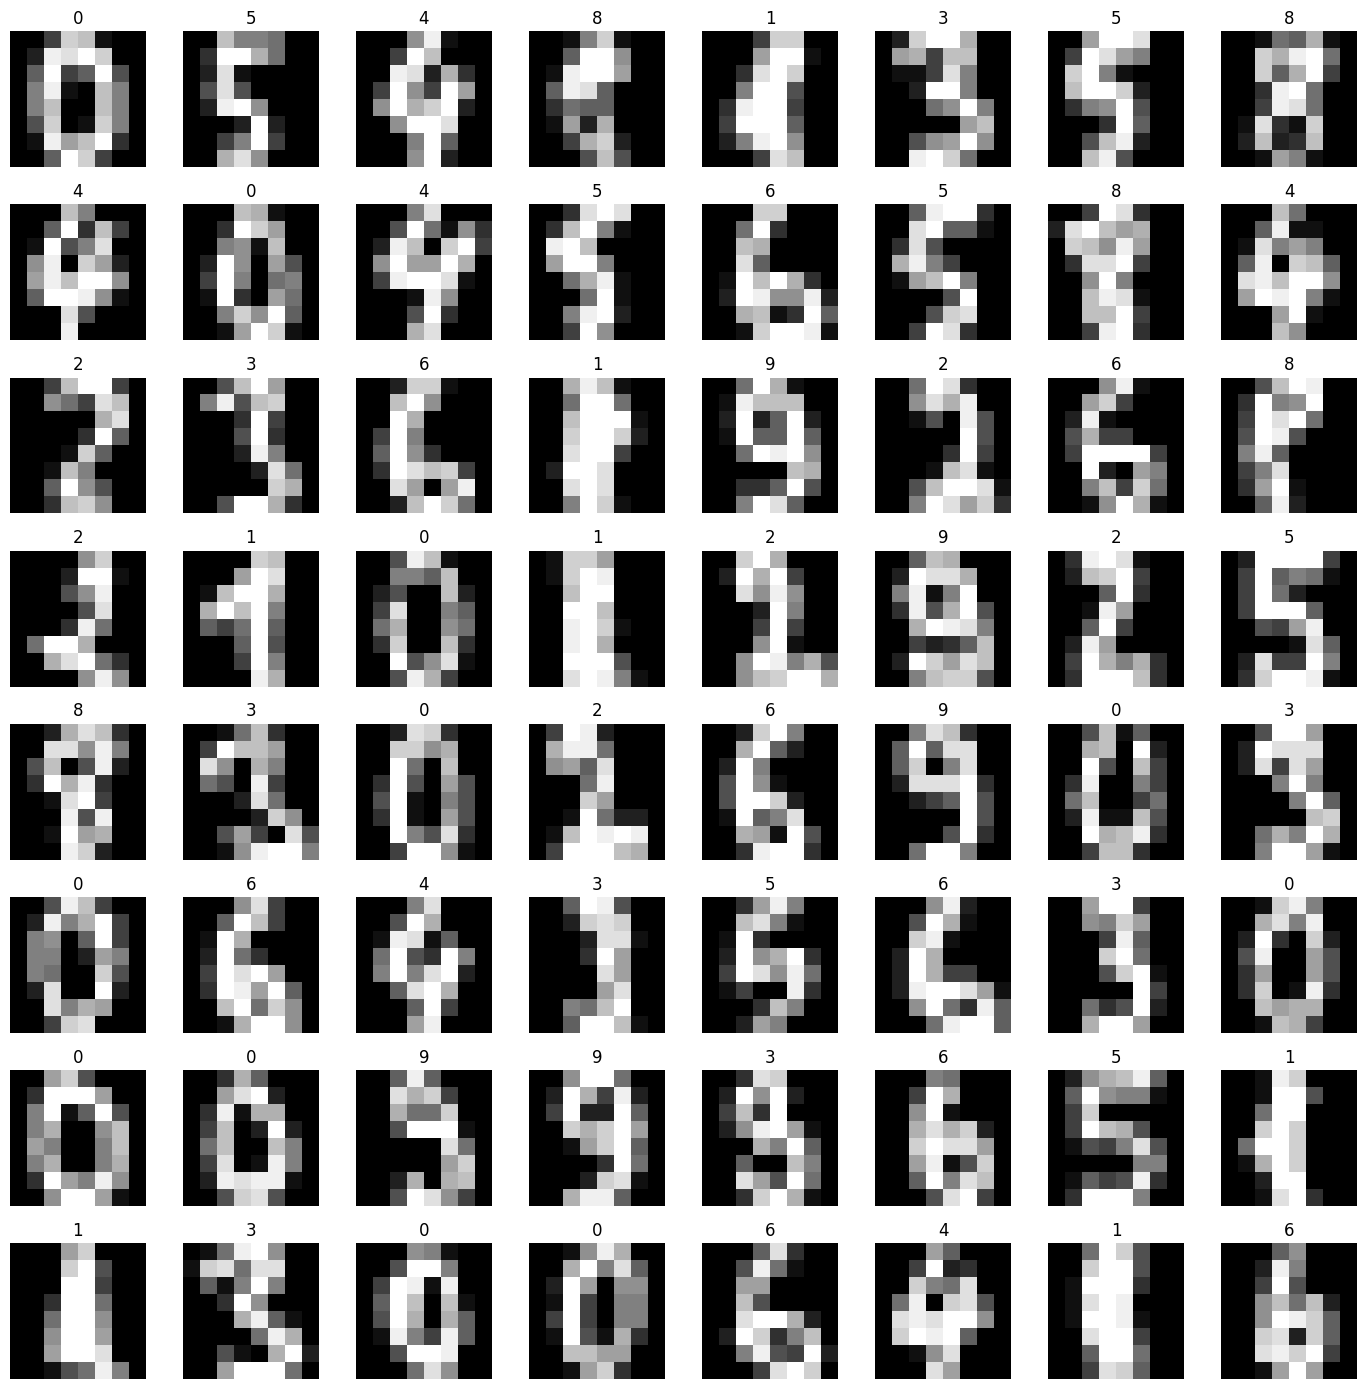

Epoch    0/100 Loss: 5.517850 Accuracy: 13.25%
Epoch    1/100 Loss: 2.955808 Accuracy: 22.75%
Epoch    2/100 Loss: 1.895774 Accuracy: 41.61%
Epoch    3/100 Loss: 1.283367 Accuracy: 55.80%
Epoch    4/100 Loss: 0.942560 Accuracy: 67.45%
Epoch    5/100 Loss: 0.722668 Accuracy: 75.60%
Epoch    6/100 Loss: 0.584421 Accuracy: 80.76%
Epoch    7/100 Loss: 0.486791 Accuracy: 84.03%
Epoch    8/100 Loss: 0.420014 Accuracy: 86.55%
Epoch    9/100 Loss: 0.365730 Accuracy: 88.42%
Epoch   10/100 Loss: 0.324533 Accuracy: 90.68%
Epoch   11/100 Loss: 0.296829 Accuracy: 91.17%
Epoch   12/100 Loss: 0.268510 Accuracy: 92.52%
Epoch   13/100 Loss: 0.244534 Accuracy: 92.99%
Epoch   14/100 Loss: 0.228144 Accuracy: 93.65%
Epoch   15/100 Loss: 0.211602 Accuracy: 93.72%
Epoch   16/100 Loss: 0.202415 Accuracy: 94.35%
Epoch   17/100 Loss: 0.188744 Accuracy: 94.75%
Epoch   18/100 Loss: 0.177655 Accuracy: 95.03%
Epoch   19/100 Loss: 0.172199 Accuracy: 95.42%
Epoch   20/100 Loss: 0.160293 Accuracy: 95.98%
Epoch   21/10

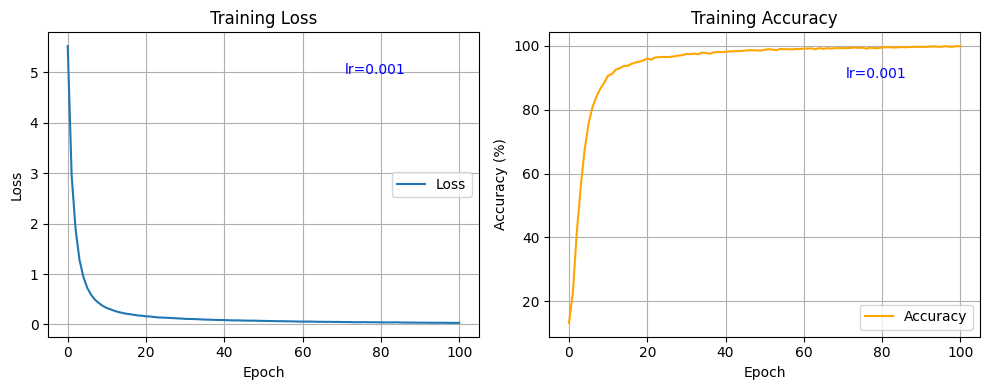

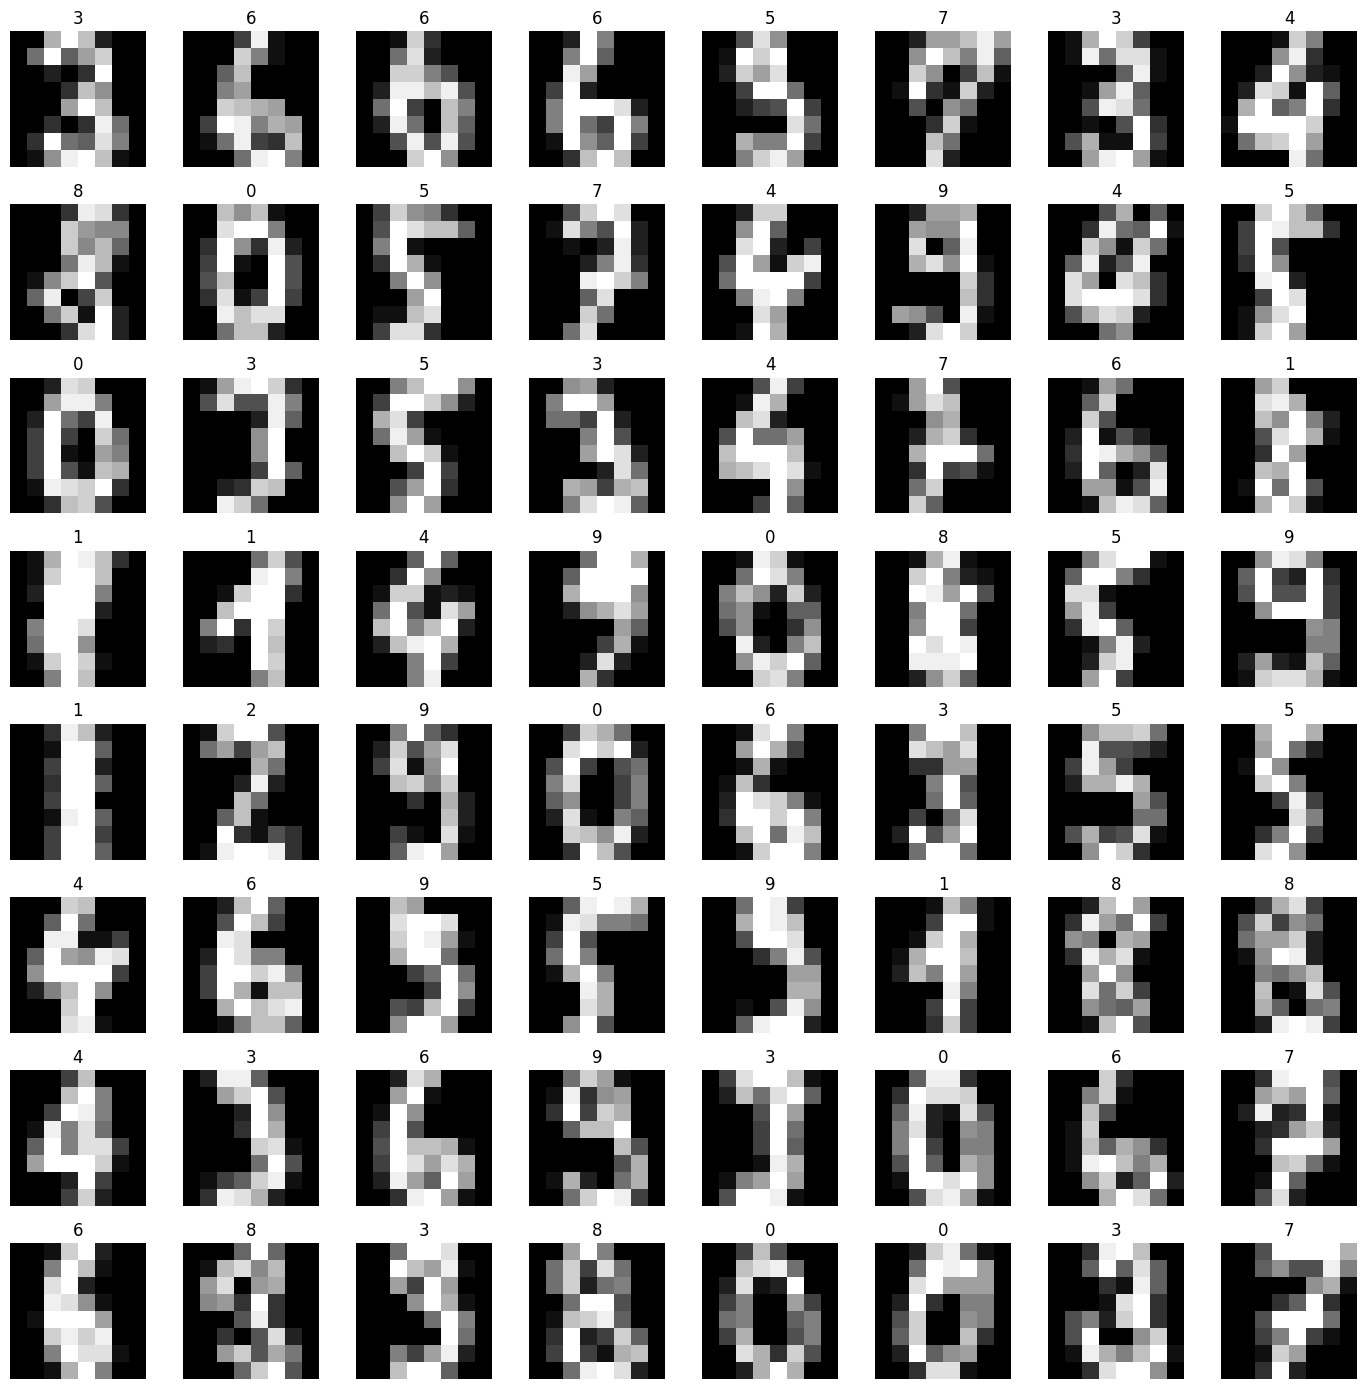

테스트 정확도는 96.39% 입니다.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader


# 1. 데이터 정의 및 텐서 변환
digits = load_digits()
X_data = digits['data']        # 8x8 이미지 → 64차원 벡터
y_data = digits['target']      # 라벨: 0 ~ 9

X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)


# 2. 학습/테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)


# 3. 데이터로더 구성 (학습 배치 제공) : 한 번에 64개의 샘플을 불러오며, 학습 시 데이터를 섞어준다.
loader = DataLoader(
    dataset=list(zip(x_train, y_train)),
    batch_size=64,
    shuffle=True,
    drop_last=False
)


# 훈련 데이터 시각화: 학습 데이터의 첫 배치를 시각화하여 데이터 확인.
imgs, labels = next(iter(loader))
visualize_batch(imgs, labels)


# 4. 모델 정의
model = nn.Sequential(
    nn.Linear(64, 10)  # 입력 64차원 → 출력 10개 클래스
)


# 5. 손실 함수 및 옵티마이저
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 6. 학습 반복
loss_history = []
accuracy_history = []
epochs = 100
for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses += loss.item()

        y_pred_index = torch.argmax(y_pred, dim=1)
        acc = (y_batch == y_pred_index).float().mean() * 100
        sum_accs += acc.item()

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    loss_history.append(avg_loss)
    accuracy_history.append(avg_acc)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')


# 학습률에 따른 변화
learning_rate = 0.001
# 시각화
plt.figure(figsize=(10, 4))
# 손실 곡선
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()
plt.text(len(loss_history) * 0.7, max(loss_history) * 0.9, f'lr={learning_rate}', fontsize=10, color='blue')

# 정확도 곡선
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(accuracy_history) * 0.7, max(accuracy_history) * 0.9, f'lr={learning_rate}', fontsize=10, color='blue')

plt.tight_layout()
plt.show()

# 7. 테스트 데이터 평가 및 예측 시각화
y_test_pred = model(x_test)
y_test_index = torch.argmax(y_test_pred, 1)
visualize_batch(x_test[:64], y_test_index[:64])
accuracy = (y_test == y_test_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy:.2f}% 입니다.')

# **1. 학습률 변화에 따른 정확도 비교**
case1. lr = 0.01
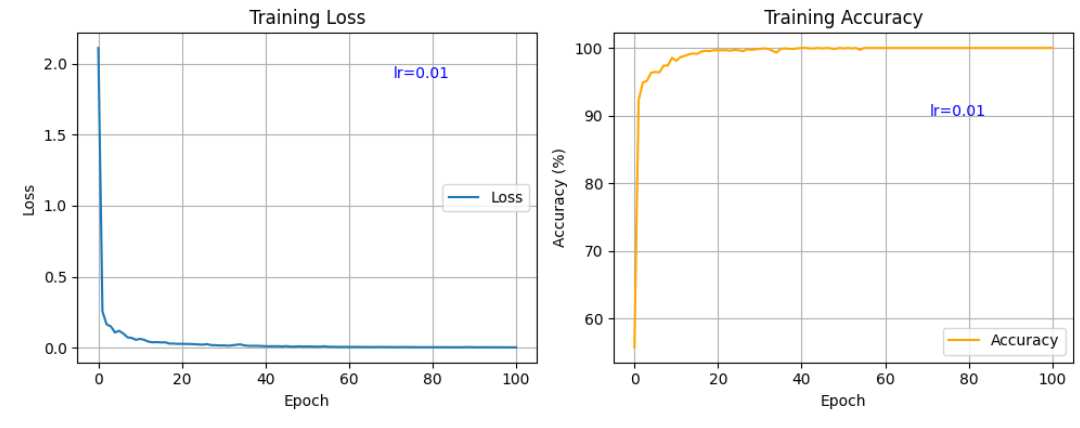

정확도: **97.50%**

case2. lr = 0.001

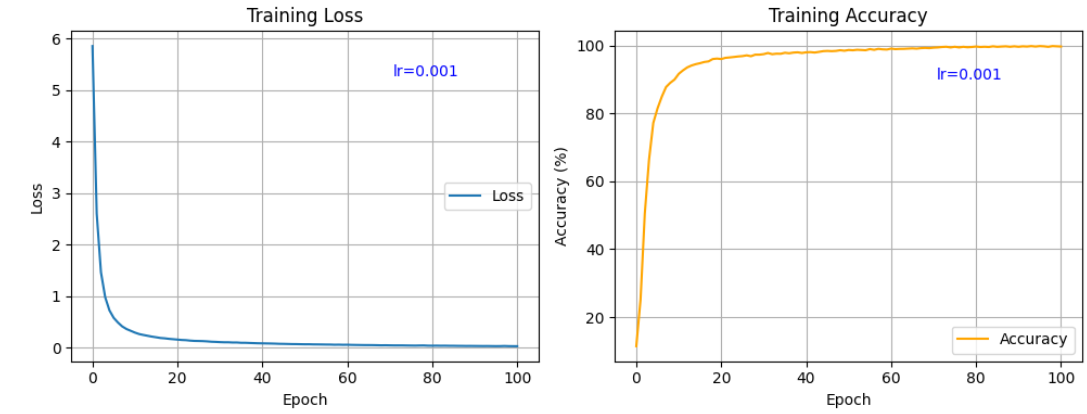



학습률 : **96.11%**

case3. lr = 0.0001

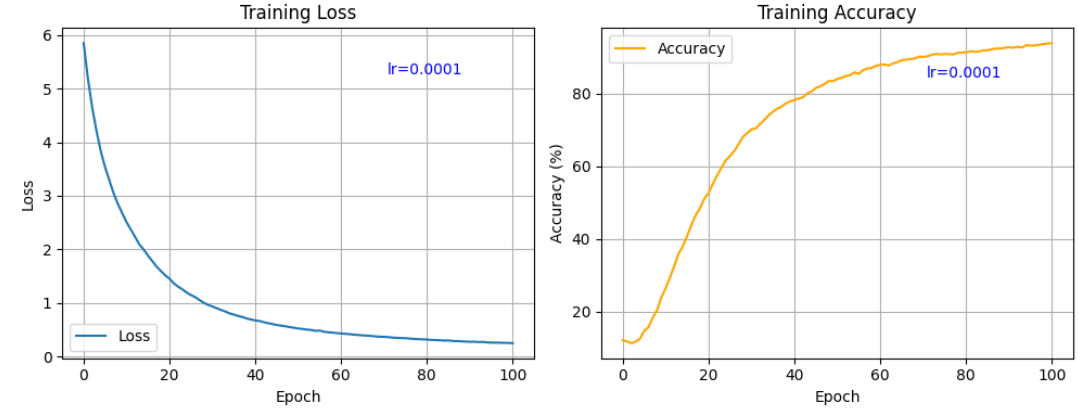

정확도: **89.44%**

# **2. 훈련 데이터 축소 후 혼동 행렬 분석**

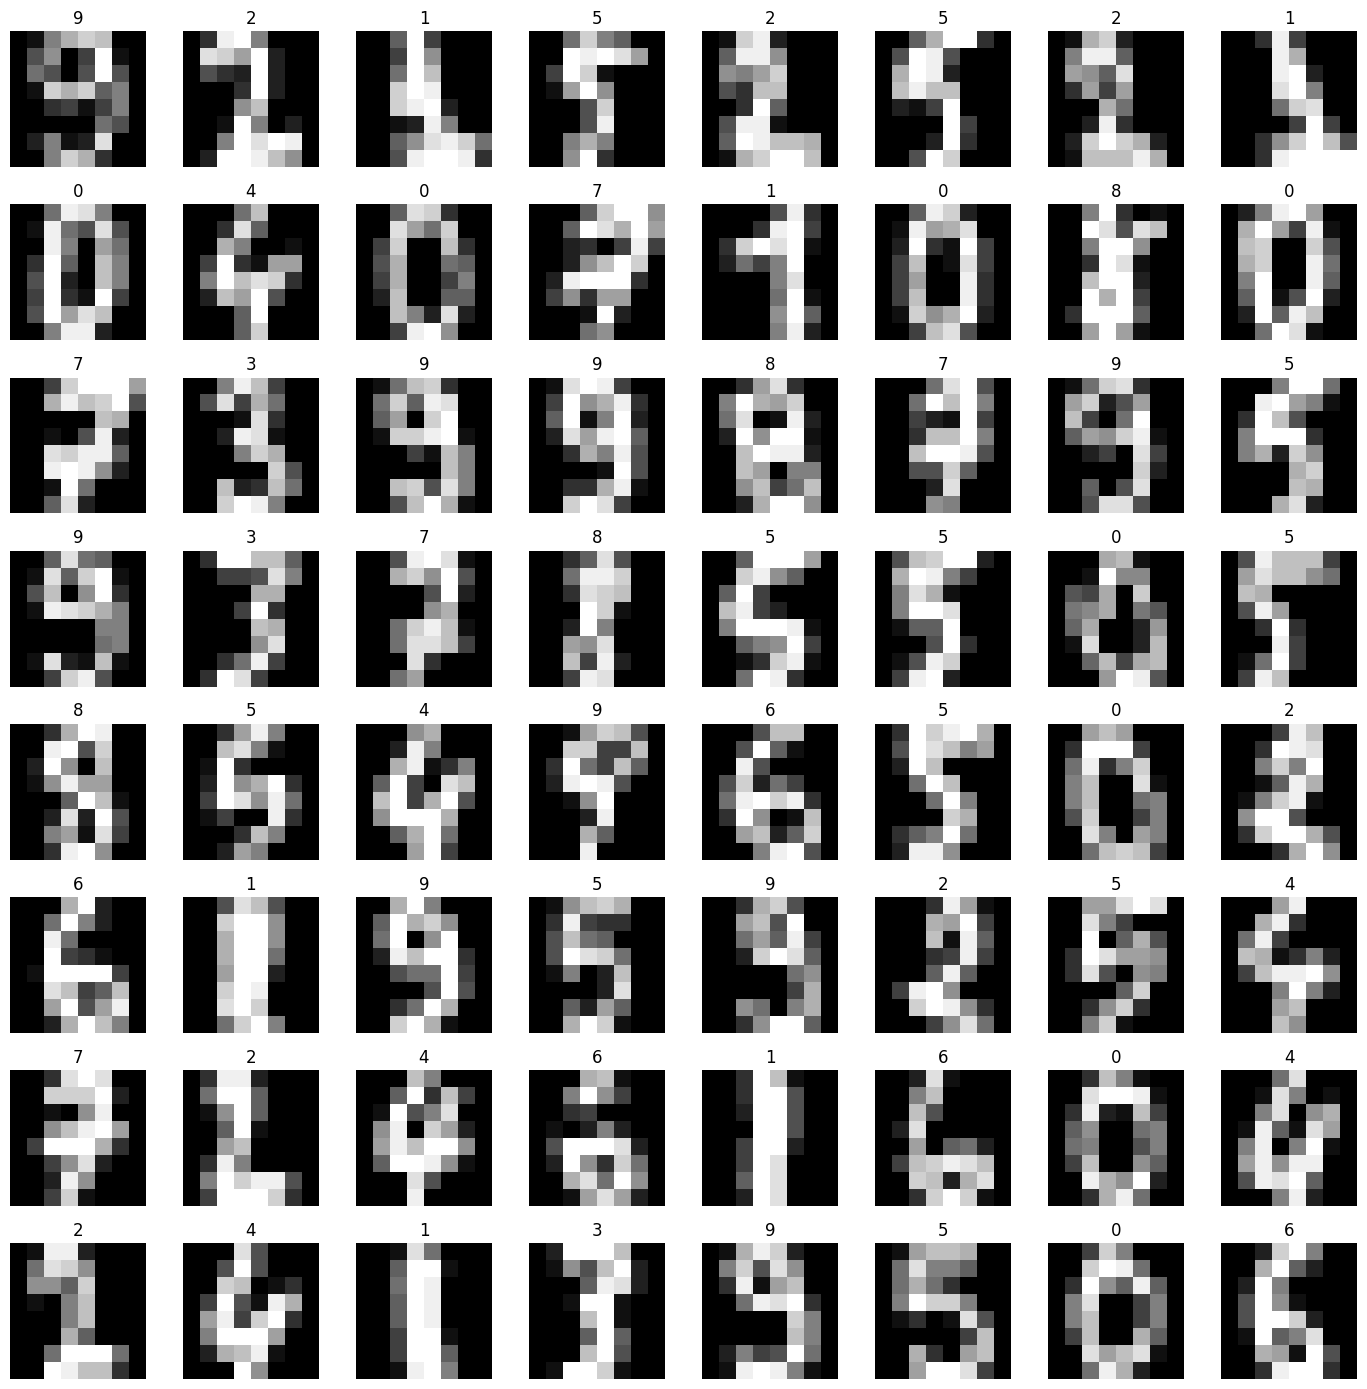

Epoch    0/100 Loss: 2.432065 Accuracy: 50.83%
Epoch    1/100 Loss: 0.378920 Accuracy: 88.33%
Epoch    2/100 Loss: 0.194668 Accuracy: 93.85%
Epoch    3/100 Loss: 0.143299 Accuracy: 94.79%
Epoch    4/100 Loss: 0.132787 Accuracy: 96.35%
Epoch    5/100 Loss: 0.129705 Accuracy: 95.73%
Epoch    6/100 Loss: 0.077567 Accuracy: 97.71%
Epoch    7/100 Loss: 0.072439 Accuracy: 98.33%
Epoch    8/100 Loss: 0.078324 Accuracy: 98.02%
Epoch    9/100 Loss: 0.067235 Accuracy: 97.81%
Epoch   10/100 Loss: 0.048671 Accuracy: 98.75%
Epoch   11/100 Loss: 0.043236 Accuracy: 99.06%
Epoch   12/100 Loss: 0.045098 Accuracy: 99.06%
Epoch   13/100 Loss: 0.037769 Accuracy: 99.48%
Epoch   14/100 Loss: 0.035109 Accuracy: 99.79%
Epoch   15/100 Loss: 0.055949 Accuracy: 98.33%
Epoch   16/100 Loss: 0.040991 Accuracy: 99.06%
Epoch   17/100 Loss: 0.026852 Accuracy: 99.79%
Epoch   18/100 Loss: 0.024502 Accuracy: 99.48%
Epoch   19/100 Loss: 0.022489 Accuracy: 99.90%
Epoch   20/100 Loss: 0.024053 Accuracy: 99.79%
Epoch   21/10

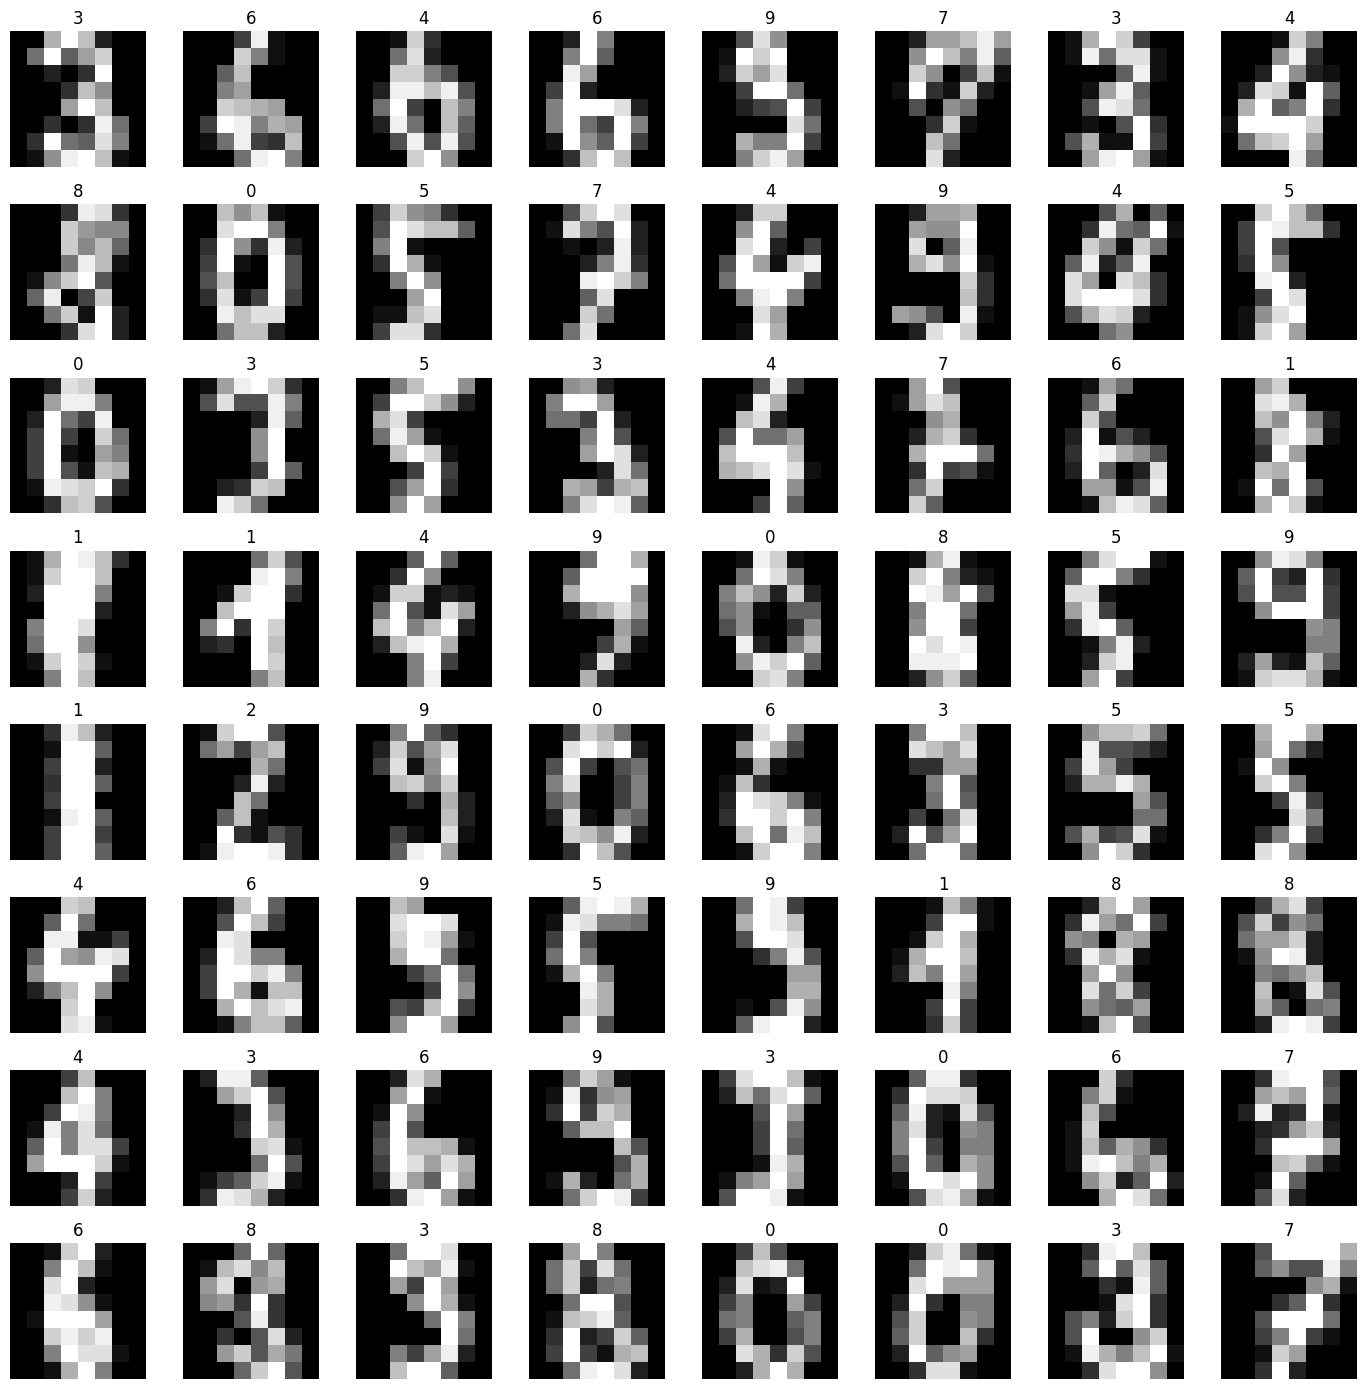

테스트 정확도는 96.22% 입니다.


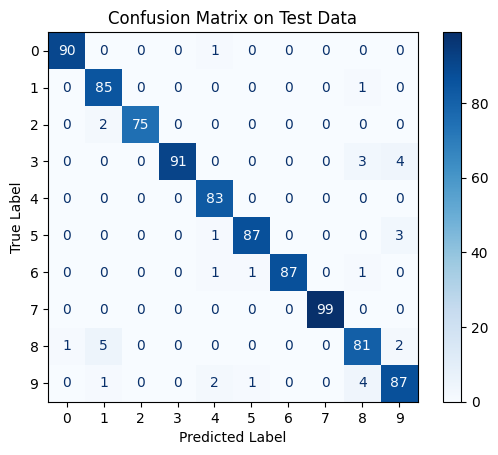

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader


# 1. 데이터 정의 및 텐서 변환
digits = load_digits()
X_data = digits['data']        # 8x8 이미지 → 64차원 벡터
y_data = digits['target']      # 라벨: 0 ~ 9

X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)


# 2. 학습/테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=2025)


# 3. 데이터로더 구성 (학습 배치 제공) : 한 번에 64개의 샘플을 불러오며, 학습 시 데이터를 섞어준다.
loader = DataLoader(
    dataset=list(zip(x_train, y_train)),
    batch_size=64,
    shuffle=True,
    drop_last=False
)


# 훈련 데이터 시각화: 학습 데이터의 첫 배치를 시각화하여 데이터 확인.
imgs, labels = next(iter(loader))
visualize_batch(imgs, labels)


# 4. 모델 정의
model = nn.Sequential(
    nn.Linear(64, 10)  # 입력 64차원 → 출력 10개 클래스
)


# 5. 손실 함수 및 옵티마이저
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# 6. 학습 반복
loss_history = []
accuracy_history = []
epochs = 100
for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses += loss.item()

        y_pred_index = torch.argmax(y_pred, dim=1)
        acc = (y_batch == y_pred_index).float().mean() * 100
        sum_accs += acc.item()

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    loss_history.append(avg_loss)
    accuracy_history.append(avg_acc)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')


# 7. 테스트 데이터 평가 및 예측 시각화
y_test_pred = model(x_test)
y_test_index = torch.argmax(y_test_pred, 1)
visualize_batch(x_test[:64], y_test_index[:64])
accuracy = (y_test == y_test_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy:.2f}% 입니다.')


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = y_test.numpy()
y_pred = y_test_index.numpy()
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **2. 오분류된 숫자를 확인하고, 그 이유를 분석해보세요.**

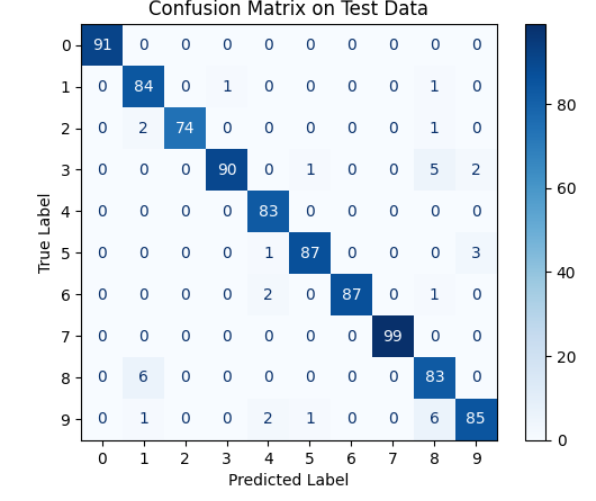

오분류가 자주 발생한 숫자들 (총 오분류 횟수 3회 이상)
- 2 → 1(2회), 8(1회)
> 2와 1은 직선 느낌이 있고, 8과는 곡선이 유사할 수 있다.

- 3 → 5(1회), 8(5회), 9(2회)
> 3과 8, 9는 곡선이 많아 유사하게 분류되었을 가능성이 있다.

- 5 → 4(1회), 9(3회)
> 5와 9는 손글씨 형태에 따라 헷갈릴 수 있다.

- 6 → 4(2회), 8(1회)
> 곡선 형태에서 유사하다.

- 8 → 1(6회)
> 손글씨 8이 위쪽 고리가 작거나 뚜렷하지 않으면 1처럼 보일 수 있고, 이미지가 흐리거나 왜곡되었을 경우 직선형태로 축소 인식 될 수 있다.

- 9 → 1(1회), 4(2회), 5(1회), 8(6회)

0, 3, 7은 대부분 정확하게 분류되었다.

